In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/Vaibhav-Mehta-19/linear-regression-weather-dataset/master/weather.csv")

In [113]:
df.drop(columns="MaxTemp",inplace=True)

In [114]:
df

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,NaN,0.5,NaN
1,14.0,0.5,4.4,9.7,ENE,39.0,E,W,4.0,17.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,NaN,0.5,NaN
2,13.7,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,NaN,0.5,NaN
3,13.3,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,24.0,...,56.0,1005.5,1007.0,2,7,13.5,14.1,NaN,0.5,NaN
4,7.6,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,NNW,68.5,SSE,NW,7.0,43.5,...,15.0,1016.1,1010.8,1,3,20.4,30.0,NaN,0.0,NaN
362,7.1,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19.0,...,22.0,1020.0,1016.9,0,1,17.2,28.2,NaN,0.0,NaN
363,12.5,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9.0,...,47.0,1024.0,1022.8,3,2,14.5,18.3,NaN,0.0,NaN
364,12.5,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28.0,...,39.0,1021.0,1016.2,6,7,15.8,25.9,NaN,0.0,NaN


In [115]:
df.shape

(366, 21)

In [116]:
!pip install pandas-profiling==2.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
from pandas_profiling import profile_report

In [118]:
pf=df.profile_report()
pf

Output hidden; open in https://colab.research.google.com to view.

In [119]:
df.isnull().sum()

MinTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        366
RISK_MM            0
RainTomorrow     366
dtype: int64

In [120]:
df.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,NaN,0.5,NaN
1,14.0,0.5,4.4,9.7,ENE,39.0,E,W,4.0,17.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,NaN,0.5,NaN
2,13.7,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,NaN,0.5,NaN
3,13.3,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,24.0,...,56.0,1005.5,1007.0,2,7,13.5,14.1,NaN,0.5,NaN
4,7.6,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,NaN,0.0,NaN


In [121]:
df['Sunshine']=df.Sunshine.fillna(df.Sunshine.mean())
df['WindGustDir']=df.WindGustDir.fillna(df.WindGustDir.value_counts().index[0])
df['WindGustSpeed']=df.WindGustSpeed.fillna(df.WindGustSpeed.mean())
df['WindDir9am']=df.WindDir9am.fillna(df.WindDir9am.value_counts().index[0])
df['WindDir3pm']=df.WindDir3pm.fillna(df.WindDir3pm.value_counts().index[0])
df['WindSpeed9am']=df.WindSpeed9am.fillna(df.WindSpeed9am.mean())

In [122]:
df.isnull().sum()

MinTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        366
RISK_MM            0
RainTomorrow     366
dtype: int64

In [123]:
# df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

# df_flights.head()

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


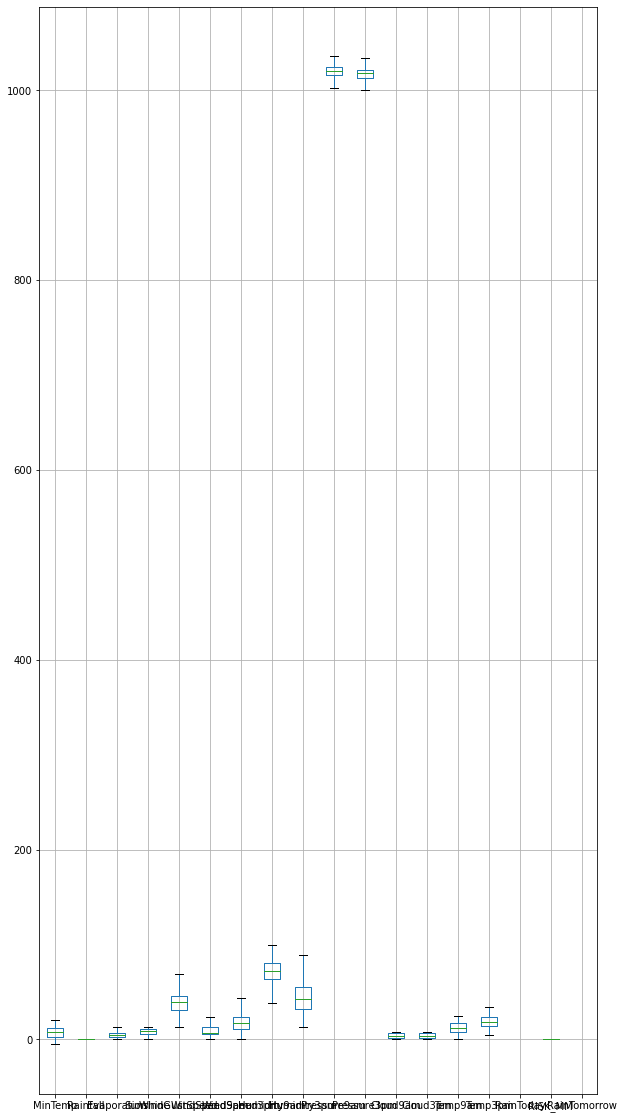

In [125]:
plt.figure(figsize=(10,20))
df.boxplot()

In [126]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence    

In [127]:
df.dtypes!=object

MinTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [128]:
l=[]
for index, i in enumerate(df.dtypes!=object):
  if i==True:
    l.append(index)
print(l)

[0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [129]:
columns=df.columns
df2=[]
for i in l:
  df2.append(columns[i])

In [130]:
for i in df2:
  outliers_imputation_mild(df,i)

IQR: 10.2
Lower Fence MinTemp: -13.0
Upper Fence MinTemp: 27.799999999999997
____________________________________________
IQR: 0.2
Lower Fence Rainfall: -0.30000000000000004
Upper Fence Rainfall: 0.5
____________________________________________
IQR: 4.2
Lower Fence Evaporation: -4.1000000000000005
Upper Fence Evaporation: 12.700000000000001
____________________________________________
IQR: 4.5
Lower Fence Sunshine: -0.75
Upper Fence Sunshine: 17.25
____________________________________________
IQR: 15.0
Lower Fence WindGustSpeed: 8.5
Upper Fence WindGustSpeed: 68.5
____________________________________________
IQR: 7.0
Lower Fence WindSpeed9am: -4.5
Upper Fence WindSpeed9am: 23.5
____________________________________________
IQR: 13.0
Lower Fence WindSpeed3pm: -8.5
Upper Fence WindSpeed3pm: 43.5
____________________________________________
IQR: 17.0
Lower Fence Humidity9am: 38.5
Upper Fence Humidity9am: 106.5
____________________________________________
IQR: 22.75
Lower Fence Humidity3pm:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


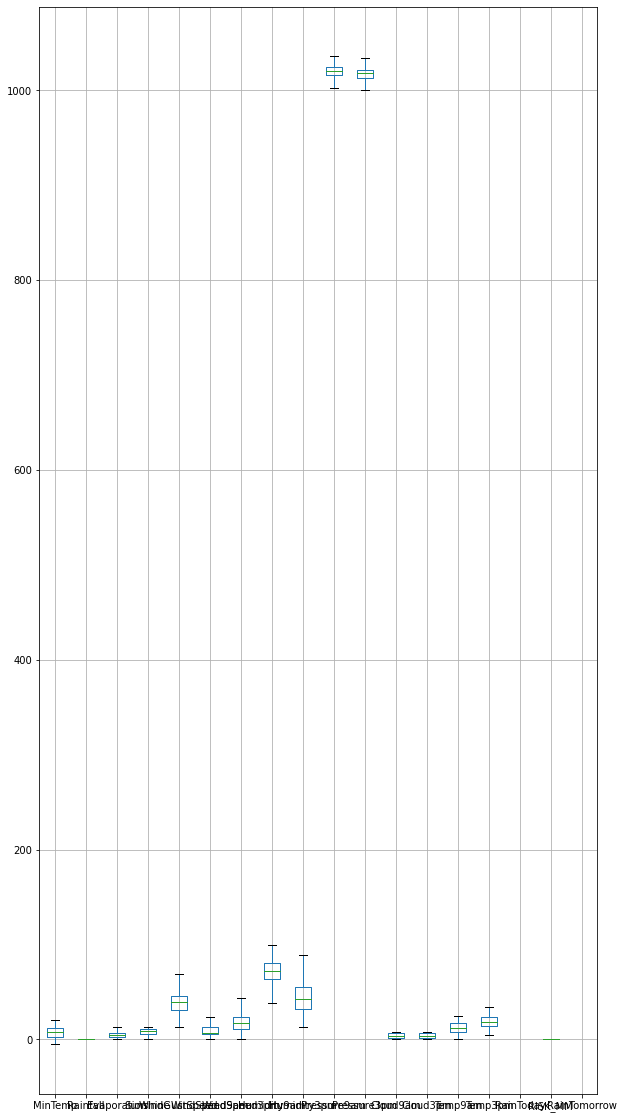

In [131]:
plt.figure(figsize=(10,20))
df.boxplot()

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer


In [133]:
df

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,NaN,0.5,NaN
1,14.0,0.5,4.4,9.7,ENE,39.0,E,W,4.0,17.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,NaN,0.5,NaN
2,13.7,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,NaN,0.5,NaN
3,13.3,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,24.0,...,56.0,1005.5,1007.0,2,7,13.5,14.1,NaN,0.5,NaN
4,7.6,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,NNW,68.5,SSE,NW,7.0,43.5,...,15.0,1016.1,1010.8,1,3,20.4,30.0,NaN,0.0,NaN
362,7.1,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19.0,...,22.0,1020.0,1016.9,0,1,17.2,28.2,NaN,0.0,NaN
363,12.5,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9.0,...,47.0,1024.0,1022.8,3,2,14.5,18.3,NaN,0.0,NaN
364,12.5,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28.0,...,39.0,1021.0,1016.2,6,7,15.8,25.9,NaN,0.0,NaN


In [134]:
df.dtypes!=object

MinTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [135]:
dt={'No':0,'Yes':1}

In [136]:
df['RainToday']=df["RainToday"].map(dt)
df['RainTomorrow']=df["RainTomorrow"].map(dt)
df

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,NaN,0.5,NaN
1,14.0,0.5,4.4,9.7,ENE,39.0,E,W,4.0,17.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,NaN,0.5,NaN
2,13.7,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,NaN,0.5,NaN
3,13.3,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,24.0,...,56.0,1005.5,1007.0,2,7,13.5,14.1,NaN,0.5,NaN
4,7.6,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,NNW,68.5,SSE,NW,7.0,43.5,...,15.0,1016.1,1010.8,1,3,20.4,30.0,NaN,0.0,NaN
362,7.1,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19.0,...,22.0,1020.0,1016.9,0,1,17.2,28.2,NaN,0.0,NaN
363,12.5,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9.0,...,47.0,1024.0,1022.8,3,2,14.5,18.3,NaN,0.0,NaN
364,12.5,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28.0,...,39.0,1021.0,1016.2,6,7,15.8,25.9,NaN,0.0,NaN


In [137]:
df2=df[["WindGustDir","WindDir3pm", "WindDir9am"]].copy()

In [138]:
df2

,WindGustDir,WindDir3pm,WindDir9am
0,NW,NW,SW
1,ENE,W,E
2,NW,NNE,N
3,NW,W,WNW
4,SSE,ESE,SSE
...,...,...,...
361,NNW,NW,SSE
362,N,NNW,NNW
363,ESE,ENE,ENE
364,NW,WNW,SSW


In [139]:
df3=pd.get_dummies(df2)
df3

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
362,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
363,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [140]:
df4=df.drop(columns=["WindGustDir","WindDir3pm", "WindDir9am"])
df4

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7,7,14.4,23.6,NaN,0.5,NaN
1,14.0,0.5,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5,3,17.5,25.7,NaN,0.5,NaN
2,13.7,0.5,5.8,3.3,68.5,6.0,6.0,82.0,69.0,1009.5,1007.2,8,7,15.4,20.2,NaN,0.5,NaN
3,13.3,0.5,7.2,9.1,54.0,23.5,24.0,62.0,56.0,1005.5,1007.0,2,7,13.5,14.1,NaN,0.5,NaN
4,7.6,0.5,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7,7,11.1,15.4,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,68.5,7.0,43.5,38.5,15.0,1016.1,1010.8,1,3,20.4,30.0,NaN,0.0,NaN
362,7.1,0.0,11.6,12.7,48.0,2.0,19.0,45.0,22.0,1020.0,1016.9,0,1,17.2,28.2,NaN,0.0,NaN
363,12.5,0.0,8.4,5.3,43.0,11.0,9.0,63.0,47.0,1024.0,1022.8,3,2,14.5,18.3,NaN,0.0,NaN
364,12.5,0.0,5.0,7.1,46.0,6.0,28.0,69.0,39.0,1021.0,1016.2,6,7,15.8,25.9,NaN,0.0,NaN


In [141]:
df5=pd.concat([df4,df3], join="outer", axis=1)
df5

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,8.0,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,...,0,0,0,0,0,0,1,0,0,0
1,14.0,0.5,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,...,0,0,0,0,0,0,0,0,0,0
2,13.7,0.5,5.8,3.3,68.5,6.0,6.0,82.0,69.0,1009.5,...,0,0,0,0,0,0,0,0,0,0
3,13.3,0.5,7.2,9.1,54.0,23.5,24.0,62.0,56.0,1005.5,...,0,0,0,0,0,0,0,0,1,0
4,7.6,0.5,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,7.6,12.1,68.5,7.0,43.5,38.5,15.0,1016.1,...,0,0,0,0,1,0,0,0,0,0
362,7.1,0.0,11.6,12.7,48.0,2.0,19.0,45.0,22.0,1020.0,...,1,0,0,0,0,0,0,0,0,0
363,12.5,0.0,8.4,5.3,43.0,11.0,9.0,63.0,47.0,1024.0,...,0,0,0,0,0,0,0,0,0,0
364,12.5,0.0,5.0,7.1,46.0,6.0,28.0,69.0,39.0,1021.0,...,0,0,0,0,0,1,0,0,0,0


In [142]:
# To check multi colinearity
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [143]:
vif_score(df4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


MissingDataError: ignored